Explain data and processing Que tiene que hacer banorte?

In [70]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [71]:
df1 = pd.read_csv('data1/bank-additional-full.csv', sep=';')
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [73]:
for column in df1:
    if df1[column].dtype == 'object':
        unique_values = df1[column].unique()
        print(column, ":", unique_values)
        print("--------------------------")

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
--------------------------
marital : ['married' 'single' 'divorced' 'unknown']
--------------------------
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--------------------------
default : ['no' 'unknown' 'yes']
--------------------------
housing : ['no' 'yes' 'unknown']
--------------------------
loan : ['no' 'yes' 'unknown']
--------------------------
contact : ['telephone' 'cellular']
--------------------------
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
--------------------------
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
--------------------------
poutcome : ['nonexistent' 'failure' 'success']
--------------------------
y : ['no' 'yes']
--------------------------


# Check Assumptions for Factor Analysis

# Data prep

In [78]:
df1.drop(columns=['contact', 'month', 'day_of_week', 'duration', 'pdays', 'previous', 'poutcome'], axis=1, inplace=True)

In [79]:
for column in df1:
    if df1[column].dtype == 'object':
        if 'unknown' in df1[column].values:
            mode_category = df1[column].mode()[0]
            df1[column].fillna(mode_category, inplace=True)

In [75]:
# Create a copy of the dataframe
df_transformed = df1.copy()

# Initialize the LabelEncoder
le = LabelEncoder()

# Iterate over each column in the dataframe
for column in df_transformed.columns:
    # Check if the column is of object type
    if df_transformed[column].dtype == 'object':
        # Encode the values using LabelEncoder
        df_transformed[column] = le.fit_transform(df_transformed[column])

df_transformed.rename(columns={
    'age': 'Age', 
    'job': 'Job', 
    'marital': 'Marital Status', 
    'education': 'Education', 
    'default': 'Default', 
    'housing': 'Housing', 
    'loan': 'Loan', 
    'contact': 'Contact', 
    'month': 'Month', 
    'day_of_week': 'Day of Week', 
    'duration': 'Duration', 
    'campaign': 'Campaign', 
    'pdays': 'Pdays', 
    'previous': 'Previous', 
    'poutcome': 'Poutcome', 
    'emp.var.rate': 'Employment Variation Rate', 
    'cons.price.idx': 'Consumer Price Index', 
    'cons.conf.idx': 'Consumer Confidence Index', 
    'euribor3m': 'Euribor 3 Month', 
    'nr.employed': 'Number of Employees', 
    'y': 'Subscribed Term Deposit'}, inplace=True)

df_transformed.head()

,Age,Job,Marital Status,Education,Default,Housing,Loan,Contact,Month,Day of Week,...,Campaign,Pdays,Previous,Poutcome,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3 Month,Number of Employees,Subscribed Term Deposit
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [53]:
df_transformed = df_transformed[(df_transformed['Age'] >= 18) & (df_transformed['Age'] <= 25)]
print(df_transformed.shape)
df_transformed.head()

(1661, 21)


,Age,Job,Marital Status,Education,Default,Housing,Loan,Contact,Month,Day of Week,...,Campaign,Pdays,Previous,Poutcome,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3 Month,Number of Employees,Subscribed Term Deposit
8,24,9,2,5,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
11,25,7,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
59,25,9,2,6,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
160,24,4,2,6,0,2,0,1,6,1,...,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


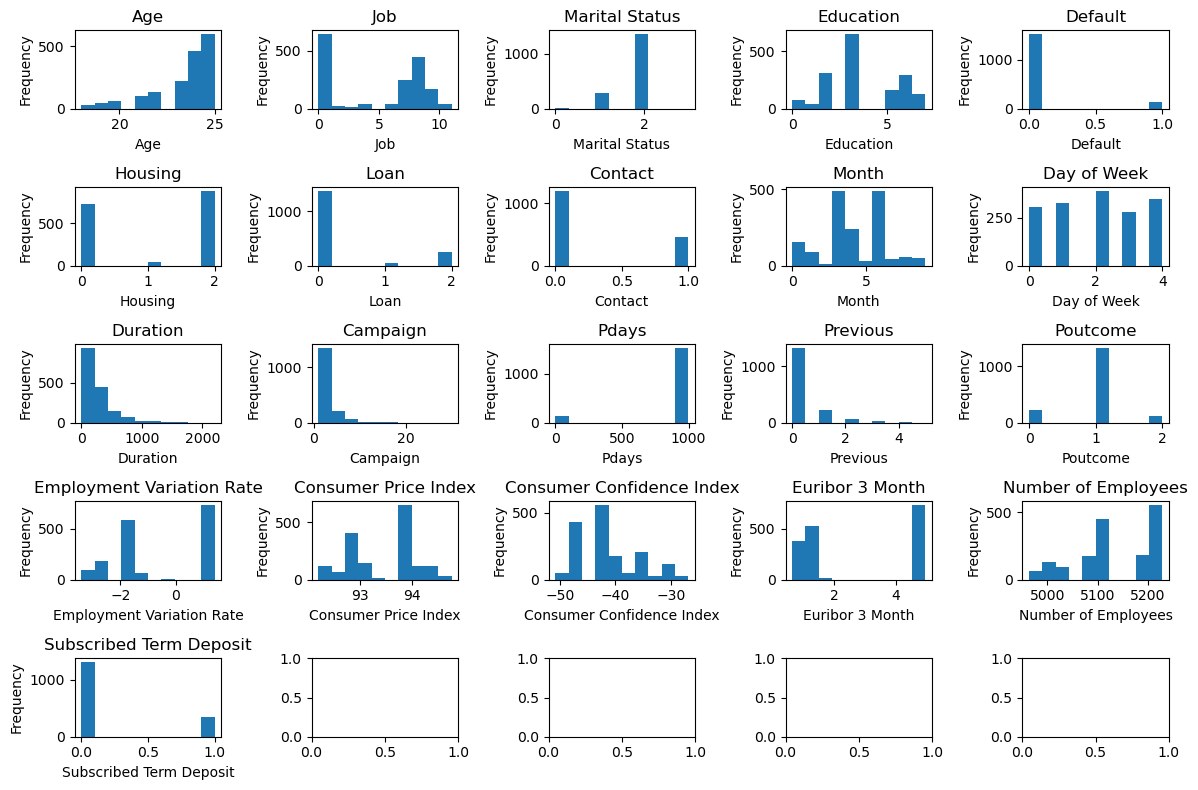

In [54]:
# Get the number of columns in the dataframe
num_columns = len(df_transformed.columns)

# Calculate the number of rows and columns for subplots
num_rows = int(num_columns / 5) + (num_columns % 5)
num_cols = 5

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Iterate over each column in the dataframe
for i, column in enumerate(df_transformed.columns):
    # Calculate the subplot index
    row_index = i // num_cols
    col_index = i % num_cols
    
    # Select the subplot
    ax = axes[row_index, col_index]
    
    # Create a histogram plot
    df_transformed[column].plot.hist(ax=ax)
    
    # Set subplot title and labels
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust the layout of subplots
plt.tight_layout()

# Show the subplots
plt.show()

In [55]:
df_transformed.describe()

,Age,Job,Marital Status,Education,Default,Housing,Loan,Contact,Month,Day of Week,...,Campaign,Pdays,Previous,Poutcome,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3 Month,Number of Employees,Subscribed Term Deposit
count,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,...,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000,1661.000000
mean,23.490668,4.869356,1.805539,3.662854,0.080674,1.090909,0.328718,0.280554,4.128838,2.021674,...,2.532812,917.155930,0.297411,0.939795,-0.594100,93.504402,-41.303913,2.802252,5131.643046,0.208910
std,1.728065,3.665588,0.429478,1.856801,0.272416,0.982152,0.722496,0.449405,2.241776,1.397765,...,2.682997,273.057941,0.689455,0.445851,1.775819,0.657951,5.162932,1.907354,86.074588,0.406653
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,23.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,999.000000,0.000000,1.000000,-1.800000,92.893000,-46.200000,1.244000,5076.200000,0.000000
50%,24.000000,7.000000,2.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,...,2.000000,999.000000,0.000000,1.000000,-1.700000,93.918000,-42.700000,1.405000,5099.100000,0.000000
75%,25.000000,8.000000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,...,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-37.500000,4.958000,5228.100000,0.000000
max,25.000000,11.000000,3.000000,7.000000,1.000000,2.000000,2.000000,1.000000,9.000000,4.000000,...,30.000000,999.000000,5.000000,2.000000,1.400000,94.767000,-26.900000,4.968000,5228.100000,1.000000


In [56]:
from sklearn.feature_selection import VarianceThreshold

# Set the threshold for variance
threshold = 0.1

# Create the VarianceThreshold object
selector = VarianceThreshold(threshold)

# Fit the selector to the transformed dataframe
selector.fit(df_transformed)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = df_transformed.columns[selected_indices]

# Filter the transformed dataframe to keep only the selected features
df_filtered = df_transformed[selected_features]

print("Removed columns: ", set(df_transformed.columns) - set(selected_features))
# Display the filtered dataframe
print(df_filtered.shape)

Removed columns:  {'Default'}
(1661, 20)


# Factor Analysis

In [69]:
from sklearn.decomposition import FactorAnalysis

# Create the FactorAnalysis object
fa = FactorAnalysis(n_components=3)

# Fit the factor analysis model to the transformed dataframe
fa.fit(df_transformed)

loadings = fa.components_
pd.DataFrame(loadings, columns=df_transformed.columns).T

,0,1,2
Age,-0.255013,0.068168,-0.448343
Job,0.608510,-0.157085,0.873793
Marital Status,0.046687,-0.007119,0.088587
Education,0.162379,-0.112263,0.361177
Default,-0.016015,0.006466,-0.045854
Housing,0.042104,-0.000207,0.040144
Loan,0.016861,0.009147,-0.001612
Contact,-0.063314,0.014271,-0.114227
Month,0.285394,-0.114667,0.429884
Day of Week,0.019628,0.009596,-0.164371
